In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import env
import os
import sklearn
import acquire
import prepare

# Exercises - decision_tree

## 1. What is your baseline prediction? What is your baseline accuracy?
      remember: your baseline prediction for a classification problem is predicting the most prevelant
      class in the training dataset (the mode). When you make those predictions, what is your accuracy? 
      This is your baseline accuracy.



In [103]:
#  get and prep titanic
df= acquire.get_titanic_data()
df=prepare.prep_titanic(df)

In [104]:
df=df.drop(columns=['Unnamed: 0','passenger_id','embark_town','sex'])

In [105]:
train, validate, test =prepare.split_data(df,'survived')

train -> (534, 9), 59.93%
validate -> (178, 9),19.98%
test -> (179, 9), 20.09%


/Users/ScottBarnett/codeup-data-science/classification-exercises/prepare.py:61: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[{strat}])
/Users/ScottBarnett/codeup-data-science/classification-exercises/prepare.py:65: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  stratify=train_validate[{strat}])


In [106]:
train.head()


,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,0,0,7.8958,1,1,0,0
380,1,1,0,0,227.5250,1,0,0,0
492,0,1,0,0,30.5000,1,1,0,1
55,1,1,0,0,35.5000,1,1,0,1
243,0,3,0,0,7.1250,1,1,0,1


In [107]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [108]:
#What is your baseline prediction? survived = 0 
#calculate baseline accuracy
baseline_accuracy = 329 / (329+205)
baseline_accuracy

0.6161048689138576

## 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [109]:
#set target
target = 'survived'

In [110]:
#nset target to y_train
y_train = train[target]
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [111]:
#repeat for validate and test
y_validate = validate[target]
y_test = test[target]

In [112]:
#set all my features as my X_train
X_train = train.iloc[:,1:]
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [113]:
#repeat for validate and test
X_validate = validate.iloc[:,1:]
X_test = test.iloc[:,1:]

In [114]:
#make the object
   #import
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [115]:
#Fit in object
#building our model on our train values
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [116]:
#Transform the object
#score on my train data
clf.score(X_train, y_train)

0.9456928838951311

In [117]:
from sklearn.tree import plot_tree

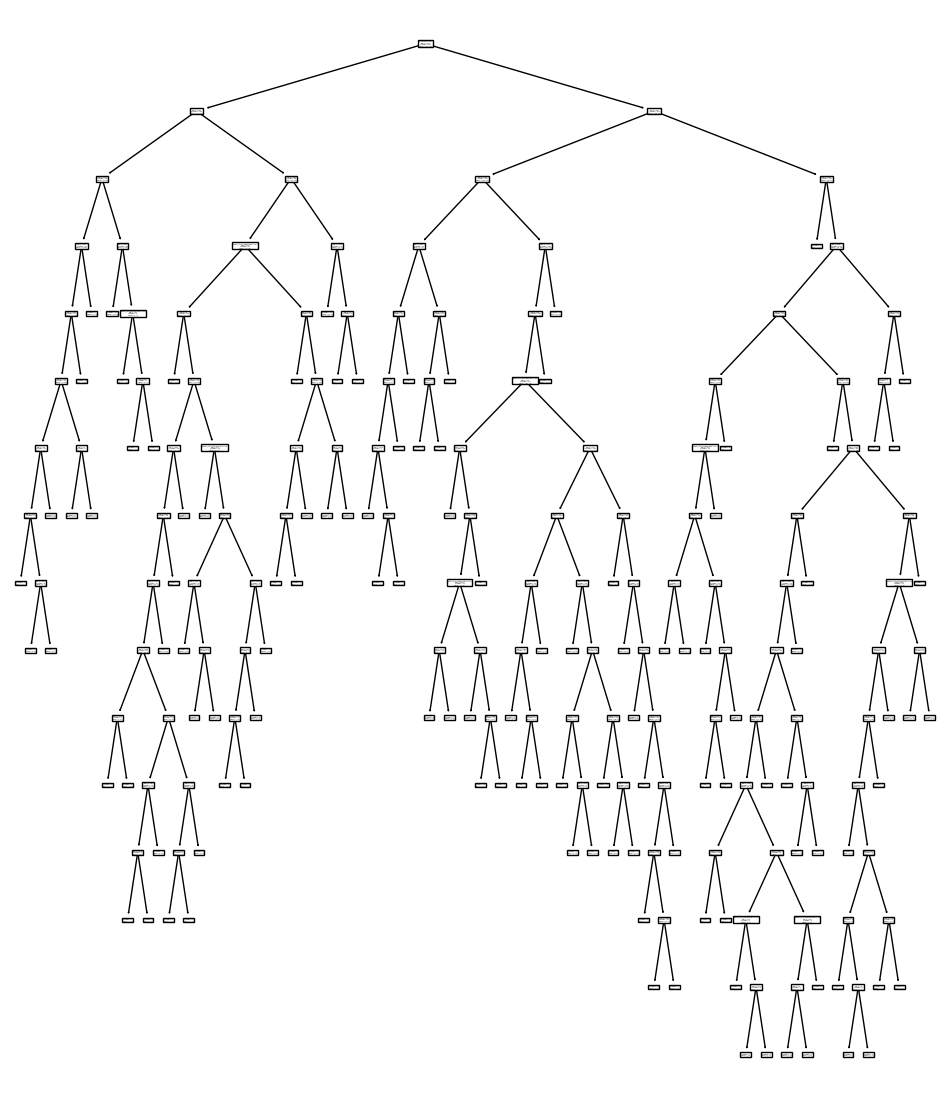

In [118]:
#see the tree that was built
#plot_tree
plt.figure(figsize=(12,14))
plot_tree(clf, #our fitted object
         feature_names=X_train.columns, #puts in our features for the questions
          #class_names=clf.classes_, #enters the selected class
          #filled=True #colors our leaves and branches based on the class
         )
plt.show()

In [119]:
#score on validate
clf.score(X_validate, y_validate)

0.7471910112359551

In [99]:
# lets change the max depth

In [120]:
#set max depth
tree1 = DecisionTreeClassifier(max_depth=5)
tree1

DecisionTreeClassifier(max_depth=5)

In [121]:
tree1.fit(X_train, y_train)
tree1.score(X_train,y_train)


0.8333333333333334

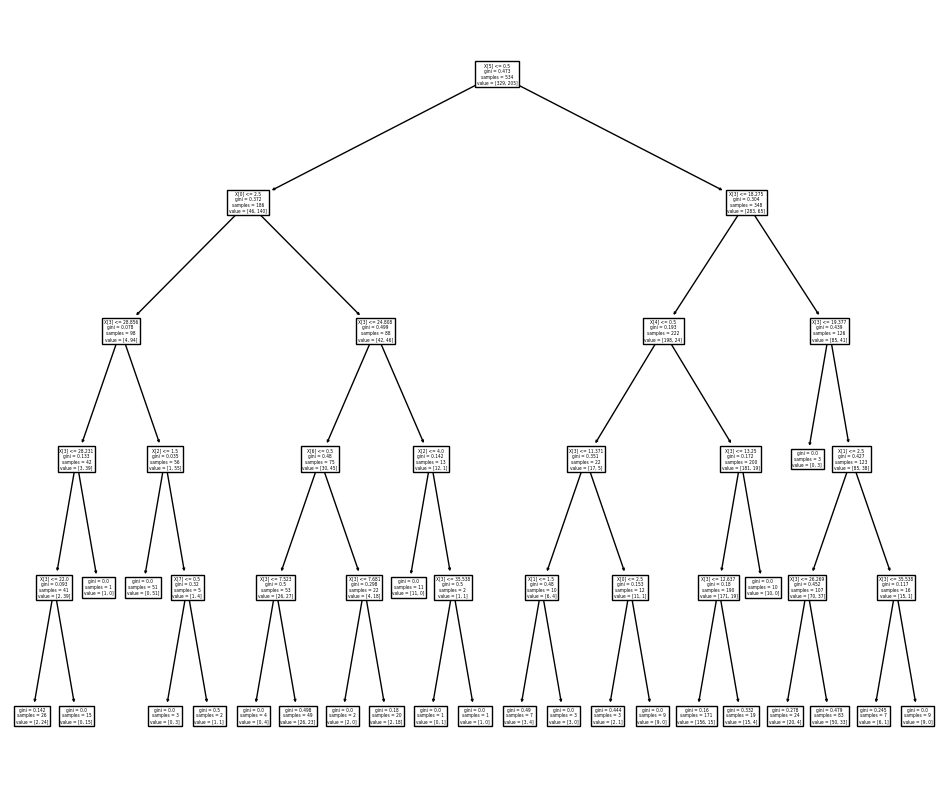

In [131]:
plt.figure(figsize=(12,10))
plot_tree(tree1, #our fitted object
         #feature_names=X_train1.columns, #puts in our features for the questions
          #class_names=clf.classes_, #enters the selected class
          #filled=True #colors our leaves and branches based on the class
         )
plt.show()

In [123]:
#score on validate
tree1.score(X_validate, y_validate)

0.7359550561797753

In [124]:
# change depth again
#set max depth
tree2 = DecisionTreeClassifier(max_depth=3)
tree2

DecisionTreeClassifier(max_depth=3)

In [125]:
tree2.fit(X_train, y_train)
tree2.score(X_train,y_train)

0.8183520599250936

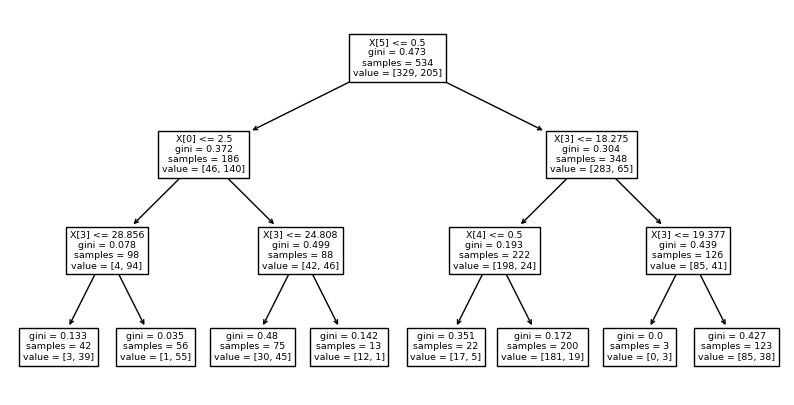

In [130]:
plt.figure(figsize=(10,5))
plot_tree(tree2, #our fitted object
         #feature_names=X_train1.columns, #puts in our features for the questions
          #class_names=clf.classes_, #enters the selected class
          #filled=True #colors our leaves and branches based on the class
         )
plt.show()

In [132]:
#score on validate
tree2.score(X_validate, y_validate)

0.7921348314606742

In [133]:
from sklearn.metrics import classification_report, confusion_matrix


In [134]:
y_pred = tree2.predict(X_train)
y_pred[:5]

array([0, 1, 0, 0, 0])

In [146]:
#generate confusion matrix!
mat=confusion_matrix(y_train, y_pred)

In [144]:
#find labels in our dataset & sort
labels = sorted(y_train.astype(str).unique())
labels

['0', '1']

In [145]:
#make pretty with df
pd.DataFrame(confusion_matrix(y_train, y_pred),
            index=[label + '_actual'for label in labels],
            columns=[label + '_predict'for label in labels])

,0_predict,1_predict
0_actual,295,34
1_actual,63,142


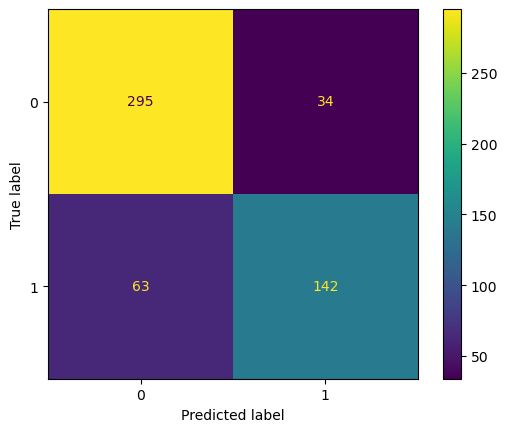

In [148]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(mat,display_labels=tree2.classes_).plot()
plt.show()


In [149]:
#generate classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80       534
weighted avg       0.82      0.82      0.82       534



In [150]:
#score on validate
tree2.score(X_test, y_test)

0.8044692737430168

## Part II Work through these same exercises using the Telco dataset.

In [184]:
df = acquire.get_telco_data()

In [185]:
df = prepare.prep_telco(df)

In [186]:
df= df.drop(columns = ['Unnamed: 0', 'customer_id', 'gender', 'senior_citizen', 'partner',
       'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type',
       'internet_service_type', 'payment_type'])

In [187]:
df

,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,9,65.60,593.30,0,1,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
1,9,59.90,542.40,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,4,73.90,280.85,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0
3,13,98.00,1237.85,1,1,0,0,0,0,1,...,1,1,1,0,0,1,0,0,1,0
4,3,83.90,267.40,0,1,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,13,55.15,742.90,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
7039,22,85.10,1873.70,1,1,0,0,0,0,0,...,1,1,1,0,0,1,0,0,1,0
7040,2,50.30,92.75,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7041,67,67.85,4627.65,1,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1


In [188]:
train, validate, test = prepare.split_data(df,'churn_Yes')

train -> (4225, 21), 59.99%
validate -> (1409, 21),20.01%
test -> (1409, 21), 20.01%


/Users/ScottBarnett/codeup-data-science/classification-exercises/prepare.py:61: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[{strat}])
/Users/ScottBarnett/codeup-data-science/classification-exercises/prepare.py:65: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  stratify=train_validate[{strat}])


In [189]:
train.churn_Yes.value_counts()

0    3104
1    1121
Name: churn_Yes, dtype: int64

In [190]:
#What is your baseline prediction? churn_Yes = 0 
#calculate baseline accuracy
baseline_accuracy = 3104 / (3104+1121)
baseline_accuracy

0.7346745562130178

In [191]:
# set target
target = 'churn_Yes'

In [192]:
#nset target to y_train
y_train = train[target]
y_train.head()

5911    0
2479    0
5889    1
6087    0
785     0
Name: churn_Yes, dtype: uint8

In [193]:
#repeat for validate and test
y_validate = validate[target]
y_test = test[target]

In [182]:
new_df = df.loc[:, df.columns != 'D']


In [194]:
#set all my features as my X_train
X_train = train.loc[:, train.columns != 'churn_Yes']
X_train.head()

,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,26,39.95,1023.75,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
2479,47,26.90,1250.85,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0
5889,1,50.45,50.45,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6087,69,60.05,4176.70,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0
785,51,87.55,4475.90,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0


In [199]:
#repeat for validate and test
X_validate = validate.loc[:, train.columns != 'churn_Yes']
X_test = test.loc[:, train.columns != 'churn_Yes']

In [200]:
#make the object
   #import
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [201]:
#Fit in object
#building our model on our train values
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [202]:
#Transform the object
#score on my train data
clf.score(X_train, y_train)

0.9976331360946745

In [203]:
#score on validate
clf.score(X_validate, y_validate)

0.7366926898509581

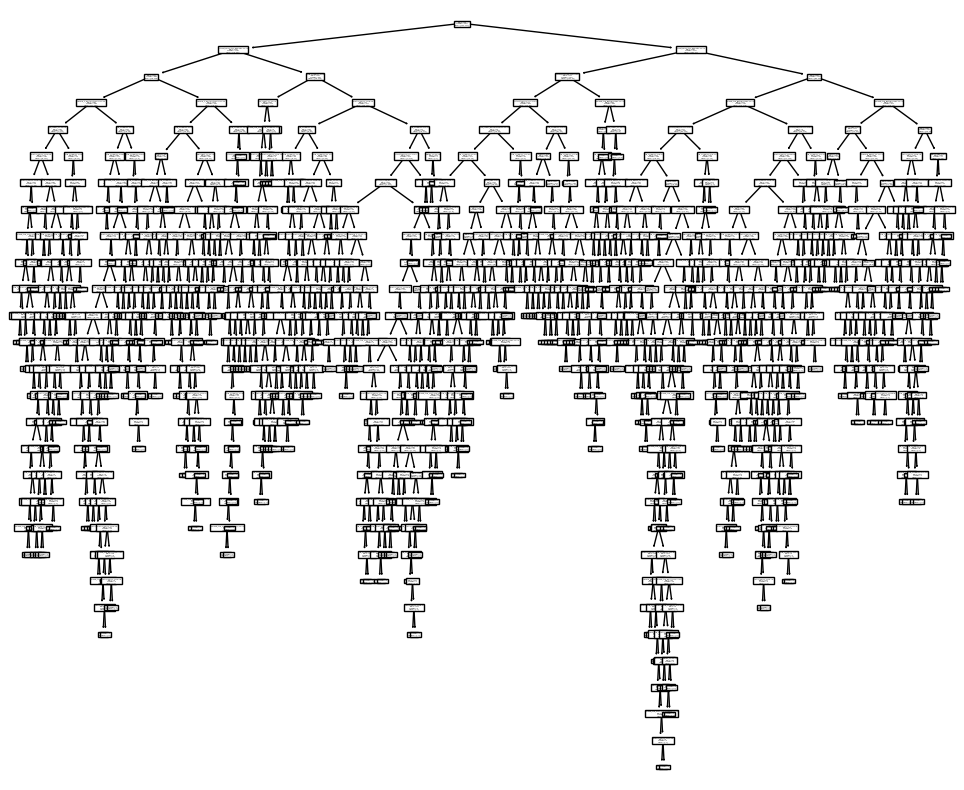

In [217]:
#plot_tree
plt.figure(figsize=(12,10))
plot_tree(clf, #our fitted object
         feature_names=X_train.columns, #puts in our features for the questions
          #class_names=clf.classes_, #enters the selected class
          #filled=True #colors our leaves and branches based on the class
         )
plt.show()

In [210]:
#set max depth
tree1 = DecisionTreeClassifier(max_depth=6)
tree1

DecisionTreeClassifier(max_depth=6)

In [211]:
tree1.fit(X_train, y_train)
tree1.score(X_train,y_train)

0.8139644970414202

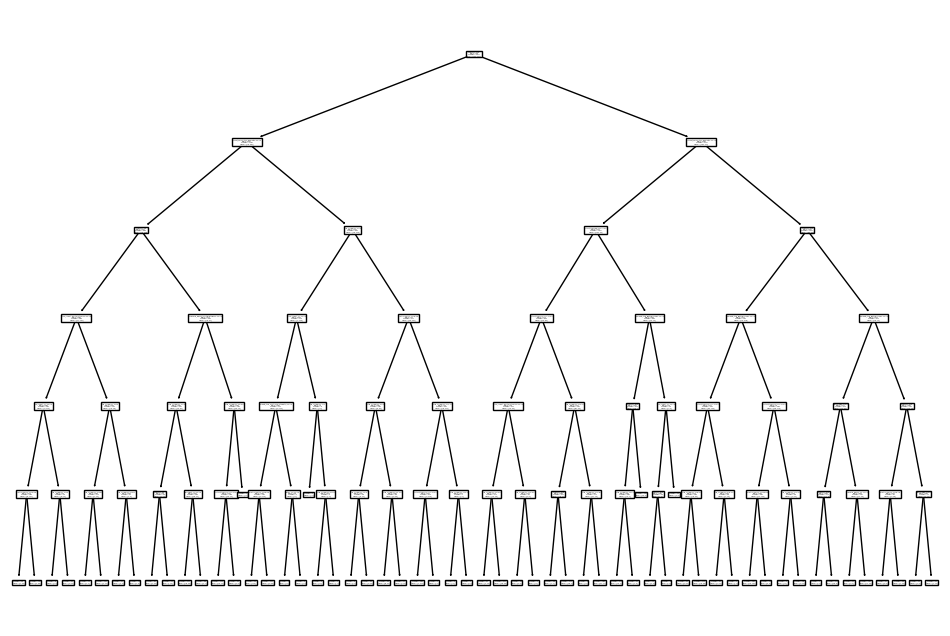

In [216]:
plt.figure(figsize=(12,8))
plot_tree(tree1, #our fitted object
         feature_names=X_train.columns, #puts in our features for the questions
          #class_names=clf.classes_, #enters the selected class
          #filled=True #colors our leaves and branches based on the class
         )
plt.show()

In [215]:
#score on validate
tree1.score(X_validate, y_validate)

0.7913413768630234